## Рекомендация тарифов

### Описание проекта

Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».
В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.
Постройте модель с максимально большим значением accuracy. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте accuracy на тестовой выборке самостоятельно.

### Задачи исследования

### [1. Откройте файл с данными и изучите общую информацию](#1)

### [2. Разделите исходные данные на обучающую, валидационную и тестовую выборки.](#2)

### [3. Исследуйте качество разных моделей, меняя гиперпараметры. Кратко напишите выводы исследования.](#3)

### [4. Проверьте качество модели на тестовой выборке.](#4)

### [5. Дополнительное задание: проверьте модели на вменяемость.](#5)

### Описание данных

Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. Известно:
    
- сalls — количество звонков,
- minutes — суммарная длительность звонков в минутах,
- messages — количество sms-сообщений,
- mb_used — израсходованный интернет-трафик в Мб,
- is_ultra — каким тарифом пользовался в течение месяца (`Ультра` — 1, `Смарт` — 0).

<a id="1"></a>

### 1. Откроем файлы и изучим общую информацию

In [1]:
import pandas as pd                          
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
try:
    df = pd.read_csv('users_behavior.csv')
except Exception as e:
    print(e)
    df = pd.read_csv('/datasets/users_behavior.csv')

df.head(10)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [4]:
df.isna().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

In [5]:
df.duplicated().sum()

0

##### Вывод:
Перед нами стоит задача классификации. За целевой признак берем столбец is_ultra. Остальные признаки помогут нам предсказывать решение по столбцу is_ultra.

Данных не очень много, модель может быть немного переобученной.

<a id="2"></a>

### 2. Разделяем исходные данные на обучающую, валидационную и тестовую выборки.

In [6]:
df_train, vnt_df = train_test_split(df, test_size=0.40, random_state=17012022)
df_valid, test_df = train_test_split(vnt_df, test_size=0.50, random_state=17012022)

print('Размер тренерующей выборки', df_train.shape[0])
print('Размер валидационной выборки', df_valid.shape[0])
print('Размер тестовой выборки', test_df.shape[0])

Размер тренерующей выборки 1928
Размер валидационной выборки 643
Размер тестовой выборки 643


In [7]:
features_train = df_train.drop(['is_ultra'], axis=1)
target_train = df_train['is_ultra']
features_valid = df_valid.drop(['is_ultra'], axis=1)
target_valid = df_valid['is_ultra']
test_features = test_df.drop(['is_ultra'], axis=1)
test_target = test_df['is_ultra']

##### Вывод:
- обучение пройдет на данных `df_train`
- валидация модели на данных `df_valid`
- лучшая модель по валидации будет применена на данных `test_df`

<a id="3"></a>

### 3. Исследуем модели.

In [8]:
import matplotlib
import matplotlib.pyplot as plt

Лучшая глубина дерева 5 Лучшая точность 0.833592534992224


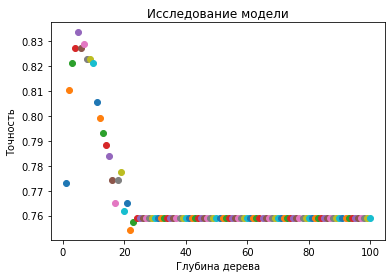

In [9]:

best_depth = 0
best_accuracy = 0

for depth in range(1,101):
    model = DecisionTreeClassifier(random_state=17012022, max_depth=depth)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    accuracy = accuracy_score(target_valid, predictions_valid)
    #print('Глубина дерева', depth,'Точность',accuracy)
    
    plt.scatter(depth, accuracy)
    plt.xlabel("Глубина дерева")
    plt.ylabel("Точность")
    plt.title("Исследование модели")
    
    if accuracy > best_accuracy:
        best_depth = depth
        best_accuracy = accuracy

print('Лучшая глубина дерева', best_depth,'Лучшая точность', best_accuracy)  

In [10]:
best_tree_model = DecisionTreeClassifier(random_state=17012022, max_depth=5)
best_tree_model.fit(features_train, target_train)
predictions_valid = best_tree_model.predict(features_valid)
accuracy = accuracy_score(target_valid, predictions_valid)
print('Глубина дерева', 5,'Точность',accuracy)

Глубина дерева 5 Точность 0.833592534992224


##### Настроим гиперпараметр criterion с gini на entropy

In [11]:
model = DecisionTreeClassifier(random_state=17012022, max_depth=5, criterion="entropy")
model.fit(features_train, target_train)
predictions_valid = best_tree_model.predict(features_valid)
accuracy = accuracy_score(target_valid, predictions_valid)
print('Глубина дерева', 5,'Точность',accuracy)

Глубина дерева 5 Точность 0.833592534992224


##### Гиперпараметр gini показывает себя лучше. Изменим splitter с best на random

In [12]:
model = DecisionTreeClassifier(random_state=17012022, max_depth=5, splitter='random')
model.fit(features_train, target_train)
predictions_valid = best_tree_model.predict(features_valid)
accuracy = accuracy_score(target_valid, predictions_valid)
print('Глубина дерева', 5,'Точность',accuracy)

Глубина дерева 5 Точность 0.833592534992224


##### Гиперпараметр best работает лучше. Перейдем к оценке случайного леса. Изменим в цикле гиперпараметр n_estimators.

Лучшее количество деревьев 52 Лучшая точность 0.8149300155520995


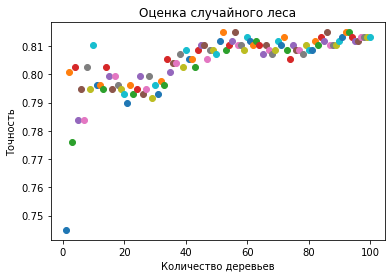

In [13]:
best_est = 0
best_accuracy = 0

for est in range(1,101):
    model = RandomForestClassifier(random_state=17012022, n_estimators=est)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    accuracy = accuracy_score(target_valid, predictions_valid)
    #print('Количество деревьев', est,'Точность',accuracy)

    plt.scatter(est, accuracy)
    plt.xlabel("Количество деревьев")
    plt.ylabel("Точность")
    plt.title("Оценка случайного леса")
    
    if accuracy > best_accuracy:
        best_est= est
        best_accuracy = accuracy

print('Лучшее количество деревьев', best_est,'Лучшая точность', best_accuracy)   

`Лучший показатель точности при количестве деревьев 52.`

In [14]:
best_forest_model = RandomForestClassifier(random_state=17012022, n_estimators=52)
best_forest_model.fit(features_train, target_train)
predictions_valid = best_forest_model.predict(features_valid)
accuracy = accuracy_score(target_valid, predictions_valid)
print('Количество деревьев', 52,'Точность',accuracy)

Количество деревьев 52 Точность 0.8149300155520995


##### Настроим гиперпараметр criterion с gini на entropy

In [15]:
model = RandomForestClassifier(random_state=17012022, n_estimators=52, criterion='entropy')
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)
accuracy = accuracy_score(target_valid, predictions_valid)
print('Количество деревьев', est,'Точность',accuracy)

Количество деревьев 100 Точность 0.8055987558320373


##### Гиперпараметр gini показывает себя лучше. Изменим bootstrap с True на Flase.

In [16]:
model = RandomForestClassifier(random_state=17012022, n_estimators=52, bootstrap=False)
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)
accuracy = accuracy_score(target_valid, predictions_valid)
print('Количество деревьев', est,'Точность',accuracy)

Количество деревьев 100 Точность 0.7838258164852255


##### bootstrap с True показывает себя лучше. Изменим warm_start с False на True

In [17]:
model = RandomForestClassifier(random_state=17012022, n_estimators=52, warm_start=True)
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)
accuracy = accuracy_score(target_valid, predictions_valid)
print('Количество деревьев', est,'Точность',accuracy)

Количество деревьев 100 Точность 0.8149300155520995


##### Значения не изменились. Перейдем к логистической регрессии. 

Лучшее количество итераций 83 Лучшая точность 0.7822706065318819


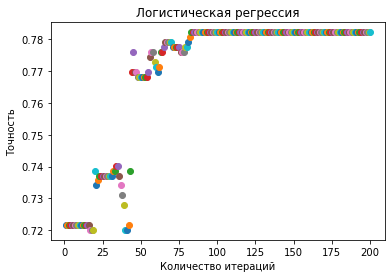

In [18]:
best_iteration = 0
best_accuracy = 0

for max_iteration in range(1,201):
    model = LogisticRegression(random_state=17012022, max_iter=max_iteration)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    accuracy = accuracy_score(target_valid, predictions_valid)
    #print('Количество итераций', max_iteration,'Точность',accuracy)
    
    plt.scatter(max_iteration, accuracy)
    plt.xlabel("Количество итераций")
    plt.ylabel("Точность")
    plt.title("Логистическая регрессия")
    
    if accuracy > best_accuracy:
        best_iteration = max_iteration
        best_accuracy = accuracy

print('Лучшее количество итераций', best_iteration,'Лучшая точность', best_accuracy)   

In [19]:
best_reg_model = LogisticRegression(random_state=17012022)
best_reg_model.fit(features_train, target_train)
predictions_valid = best_reg_model.predict(features_valid)
accuracy = accuracy_score(target_valid, predictions_valid)
print('Количество итерраций', 83,'Точность',accuracy)

Количество итерраций 83 Точность 0.7822706065318819


Значение по-умолчанию в max_iter=83 хорошее, как и у 84, 85 и т.д. итераций. Увеличение в большую сторону ничего не меняет. Изменим другой гиперпараметр solver.

In [20]:
best_solver = ''
best_accuracy = 0

for solve in {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'}:
    model = LogisticRegression(random_state=17012022, solver=solve)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    accuracy = accuracy_score(target_valid, predictions_valid)
    print('Solver', solve,'Точность',accuracy)
    if accuracy > best_accuracy:
        best_solver= solve
        best_accuracy = accuracy

print('Лучший решатель', best_solver,'Лучшая точность', best_accuracy) 

Solver lbfgs Точность 0.7822706065318819
Solver sag Точность 0.7216174183514774
Solver newton-cg Точность 0.7822706065318819
Solver liblinear Точность 0.7371695178849145
Solver saga Точность 0.7216174183514774
Лучший решатель lbfgs Лучшая точность 0.7822706065318819


##### Вывод:
В ходе исследования были получены следующие данные:

- точность модели решающего дерева при глубине 5 равна 0.833. 
- точность модели случайного леса при количестве деревьев 52 равна 0.814. 
- точность модели логистической регресии равна 0.782. 
- так как выборка небольшая, то лучший результат показывает решающее древо с гиперпараметром max_depth=5.

<a id="4"></a>

### 4. Проверяем качество модели на тестовой выборке.

In [21]:
test_predictions = best_tree_model.predict(test_features)
accuracy = accuracy_score(test_target, test_predictions)
print('Точность модели решающего леса на тестовой выборке',accuracy)

test_predictions = best_forest_model.predict(test_features)
accuracy = accuracy_score(test_target, test_predictions)
print('Точность модели случайного леса на тестовой выборке',accuracy)

test_predictions = best_reg_model.predict(test_features)
accuracy = accuracy_score(test_target, test_predictions)
print('Точность модели логистической регресиии на тестовой выборке',accuracy)

Точность модели решающего леса на тестовой выборке 0.8009331259720062
Точность модели случайного леса на тестовой выборке 0.7978227060653188
Точность модели логистической регресиии на тестовой выборке 0.7340590979782271


#### Вывод:
Для гарантий и при учете того, что выборка не будет большой, рекомендую использовать модель `случайного леса`. Показатель выше требуемого на 4 пункта.

<a id="5"></a>

### 5. Проверяем модели на адекватность.

Оценить адекватность модели можно используя несколько метрик:

- `accuracy` - точность совпадения прогнозов с правильными ответами.
- `precision` - отношение правильно предсказанных классов равных 1 к сумме правильно предсказанных классов равных 1 с неправльными предсказаниями.
- `recall` - отношение правильно предсказанных классов равных 1 к сумме правильно предсказанных классов равных 1 с неправльными предсказаниями.

In [22]:
test_predictions = best_forest_model.predict(test_features)
accuracy = accuracy_score(test_target, test_predictions)
precision = precision_score(test_target, test_predictions)
recall = recall_score(test_target, test_predictions)
print('Accuracy =', accuracy, 'Precision =', precision, 'Recall =', recall)

Accuracy = 0.7978227060653188 Precision = 0.7125 Recall = 0.5757575757575758


Для оценки адеватности используется F-мера - среднее гармоническое между precision и recall. Если хотя бы один из параметров близок к нулю, то и F-мера стремится к 0. Если оба стремятся к 1, то F-мера тоже стремится к 1.

In [23]:
f_score = f1_score(test_target, test_predictions)
print('F-мера =', f_score)

F-мера = 0.6368715083798883


#### Вывод:
Адекватность модели оценивается по нескольким параметрам. Для модели классификации это `accuracy`, `precision` и `recall`. Качество модели лучше всего отражают `precision` и `recall` и эти метрики складываются в `F-мера` как единую оценку модели.

Модель получилась среднего качества. И для таких задач она адекватна.

In [27]:
from sklearn.dummy import DummyClassifier

model = DummyClassifier(strategy="most_frequent")
model.fit(features_train, target_train)


model.score(test_features, test_target)

0.6920684292379471

### Вывод:

В ходе проделанной работы было выполнено:

- Изучен файл с данными.
- Разбиты данные на три выборки: обучающая, валидационная и тестовая.
- Исследованы три модели классификации: Решающее дерево, Случайный лес и Логистическая регрессия.
- Найдены оптимальные параметры для каждой модели и выбрана одна из них для обучения модели.
- Оценена адекватность модели.

Для обучения модели было использована выборка в 2000 значений. Этого может быть недостаточно для повышения ключевых параметров модели классификатора. Увеличение в 10 или 100 увеличит accuracy, precision и recall, а также время обучения.

Адекватность модели повышается с ростом количества значений.